# Relatorio Alinhamento de Sequencias de DNA

**Aluno: Giovanni dos Santos**

**Professor: Luciano Silva**

Neste relatorio serão comparados três algoritmos de alinhamente de sequencias de DNA desenvolvidos ao longo do curso de Supercomputação.

## Contextualização

### Smith-Waterman

Este algoritmo consiste na geração de uma matriz atraves um alinhamento local entre as duas sequencias onde cada posição da matriz recebe um valor de score dependendo dos valores presentes ao seu redor, essa técnica se baseia majoritariamente em exploitation.

### Busca-Local

Este algoritmo consiste na implementação da aleatoriedade para gerar subsequencias da primeira sequencia de diferentes tamanhos para poder analisá-las com uma serie de sequencias da segunda, esperando obter o melhor resultado possivel entre elas, essa técnica se baseia em exploration com um pouco de exploitation.

### Busca-Exaustiva
Este algoritmo consiste na implementação do conceito de procurar todas os casos possiveis e escolher o melhor deles, essa técnica se baseia puramente em exploration.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess

In [4]:
dic = {
    "input" : "./sequences/all",
    "smith" : "./smith-waterman/main",
    "local" : "./busca-local/main",
    "exaus" : "./busca-exaustiva/main",
    "localParallel" : "./busca-local-paralelo/main",
    "gpuParallel" : "./paralelo-gpu/main"
}

In [5]:
def runWithInput(exe, input_file):
    with open(input_file) as file:
        start = time.perf_counter()
        proc = subprocess.run([exe], input=file.read(),text=True, capture_output=True)
        end = time.perf_counter()
    return end-start

def getInfo(algorithm, path):
    dic_temp = {
        "times" : [],
        "sizes_a" : [],
        "sizes_b" : []
    }
    files = os.listdir(path)
    
    for file in files:
        dic_temp["times"].append(runWithInput(algorithm, f"{path}/{file}"))
        with open(f"{path}/{file}") as f:
            split = f.read().splitlines()
        dic_temp["sizes_a"].append(int(split[0]))
        dic_temp["sizes_b"].append(int(split[1]))
        
    return dic_temp


In [7]:
dicSmith = getInfo(dic["smith"], dic["input"])
dicLocal = getInfo(dic["local"], dic["input"])
dicExaus = getInfo(dic["exaus"], dic["input"])
# dicParLocal = getInfo(dic["localParallel"], dic["input"])
# dicParGPU = getInfo(dic["gpuParallel"], dic["input"])

In [11]:
import json
with open('data2.json') as json_file:
    data = json.load(json_file)



# Análises

## Smith-Waterman

Text(0.5, 0, 'Tempo')

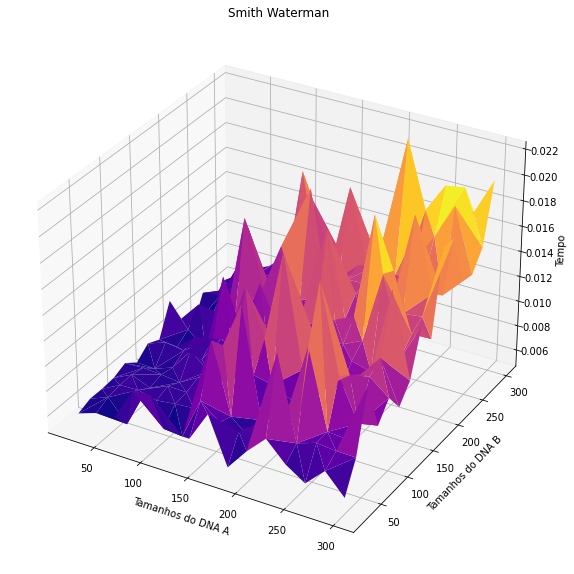

In [8]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_trisurf(dicSmith["sizes_a"], dicSmith["sizes_b"], dicSmith["times"], cmap="plasma")
ax1.set_title("Smith Waterman")
ax1.set_xlabel("Tamanhos do DNA A")
ax1.set_ylabel("Tamanhos do DNA B")
ax1.set_zlabel('Tempo')


Neste gráfico pode-se observar que conforme os tamanhos do DNA A e do DNA B aumentam, o tempo aumenta em consequencia no geral, entretando, também é possivel notar que isso não acontece de maneira uniforme pois o gráfico possui alguns outros picos fora de lugar, nos levando a acreditar que este metodo possui algumas inconsistencias

## Busca-Local

Text(0.5, 0, 'Tempo')

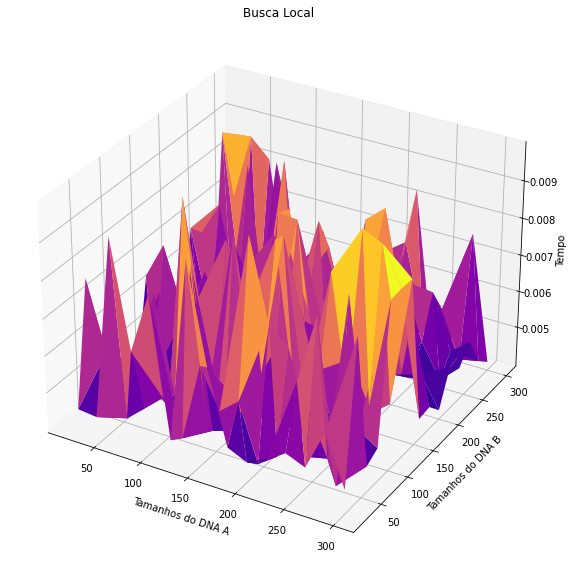

In [9]:
fig = plt.figure(figsize=(14, 10))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(dicLocal["sizes_a"], dicLocal["sizes_b"], dicLocal["times"], cmap="plasma")
ax2.set_title("Busca Local")
ax2.set_xlabel("Tamanhos do DNA A")
ax2.set_ylabel("Tamanhos do DNA B")
ax2.set_zlabel('Tempo')



Já o comportamento deste gráfico é bastante diferente por conta que o algoritmo de busca local baseia-se na 
aleatorização ao gerar as subsequencias, fazendo com que o tempo de processamento varie muito mais ao incrementarmos os tamanhos dos DNAs de entrada. Também vale ressaltar que apesar desta inconsistencia, o maior tempo obtido atraves deste algoritmo ainda é menor que o máximo obtido pelo método anterior.

## Busca Exaustiva

Text(0.5, 0, 'Tempo')

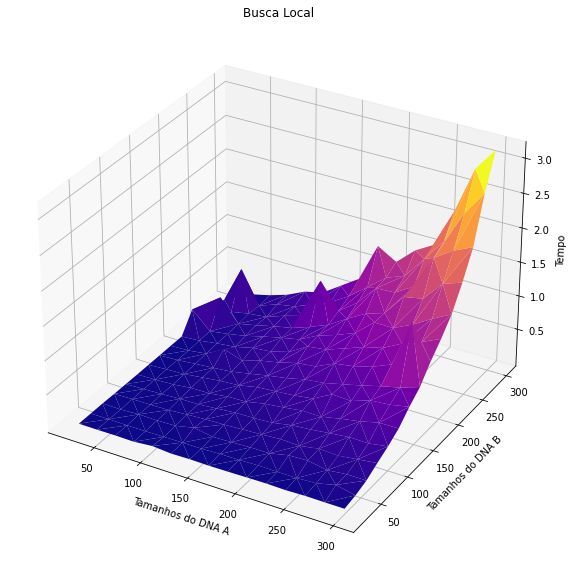

In [10]:
fig = plt.figure(figsize=(14, 10))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(dicExaus["sizes_a"], dicExaus["sizes_b"], dicExaus["times"], cmap="plasma")
ax2.set_title("Busca Local")
ax2.set_xlabel("Tamanhos do DNA A")
ax2.set_ylabel("Tamanhos do DNA B")
ax2.set_zlabel('Tempo')


Neste último gráfico podemos ver que no geral, o tempo de processamento é relativamente maior que os outros dois, isso era esperado pois este algoritmo testa todas as combinações possiveis, o que vem a se tornar cada vez mais relevante ao incrementarmos o tamanho dos DNAs de entrada, fazendo com o que o gráfico apresente um comportamento exponencial.

Text(0.5, 0, 'Tempo')

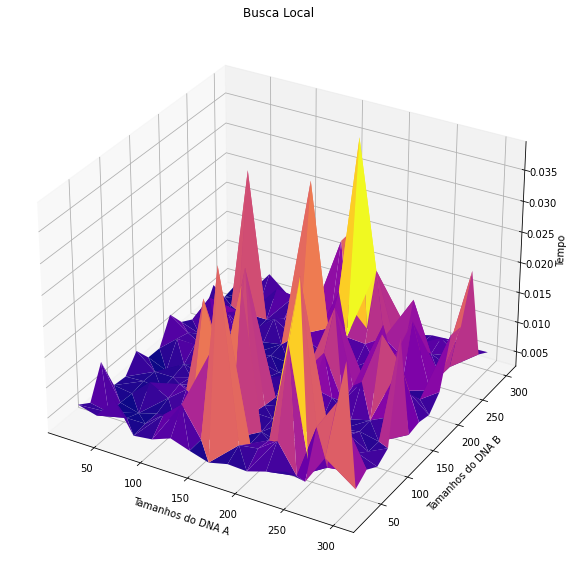

In [14]:
import json
with open('dataParLocal.json') as json_file:
    data = json.load(json_file)


fig = plt.figure(figsize=(14, 10))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(data["sizes_a"], data["sizes_b"], data["times"], cmap="plasma")
ax2.set_title("Busca Local")
ax2.set_xlabel("Tamanhos do DNA A")
ax2.set_ylabel("Tamanhos do DNA B")
ax2.set_zlabel('Tempo')


Text(0.5, 0, 'Tempo')

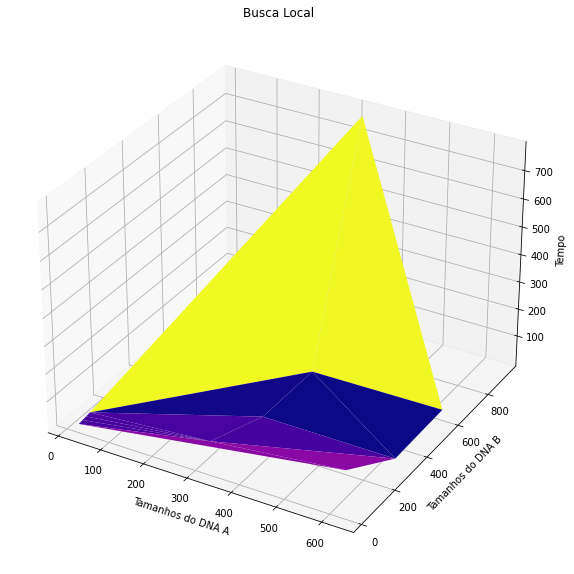

In [13]:
fig = plt.figure(figsize=(14, 10))
ax2 = fig.add_subplot(111, projection='3d')
ax2.plot_trisurf(data["ParGPU"]["sizes_a"], data["ParGPU"]["sizes_b"], data["ParGPU"]["times"], cmap="plasma")
ax2.set_title("Busca Local")
ax2.set_xlabel("Tamanhos do DNA A")
ax2.set_ylabel("Tamanhos do DNA B")
ax2.set_zlabel('Tempo')
